#Loading Breast Cancer Dataset

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import recall_score, f1_score, roc_curve, auc
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [181]:
# Breast cancer dataset for classification
data = load_breast_cancer()
target = data.target
feature_names = data.feature_names

# Create a DataFrame from the data
df = pd.DataFrame(data.data, columns=feature_names)
df['target'] = data.target
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


##Baseline Regression

In [182]:
# Baseline regression
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_baseline = LogisticRegression(max_iter=10000)
model_baseline.fit(X_train, y_train)

y_pred_baseline = model_baseline.predict(X_test)

accuracy_baseline1 = accuracy_score(y_test, y_pred_baseline)
f1_baseline1 = f1_score(y_test, y_pred_baseline, average='macro')  # Use 'macro' for multi-class classification

print(accuracy_baseline1)
print(f1_baseline1)


0.956140350877193
0.9526381387619443


#EDA - Exploratory Data Analysis

##Data set Exploration

In [183]:
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [184]:
df.shape

(569, 31)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

- No need to handle missing values because there is no missing value.

- No need to change data types.

In [186]:
df['target'] = df['target'].astype('category')

- Changing target's data type, as it's a category but was runned as an intenger.

##Understanding the Target

In [187]:
print(data.target_names)

['malignant' 'benign']


<ipython-input-188-a3d82c93d801>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_percentages.index, y=class_percentages.values, palette=colors)  # Use class_percentages.values


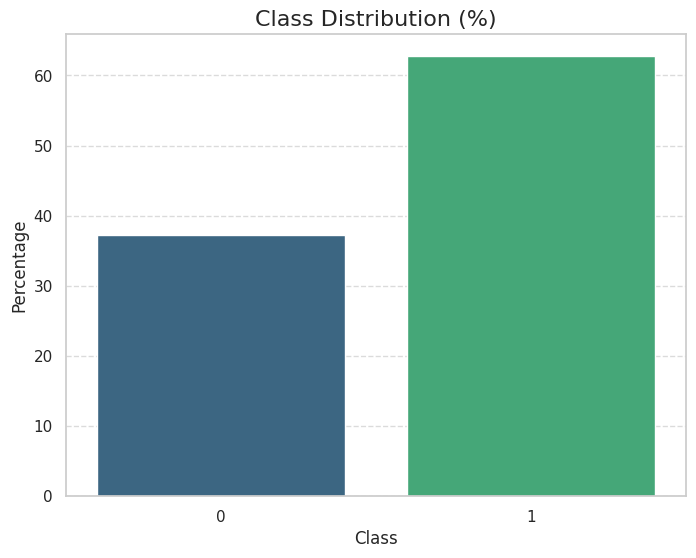

In [188]:
# Calculate class percentages
class_percentages = df['target'].value_counts(normalize=True) * 100

# Set the style for the plot
sns.set(style="whitegrid")

# Plotting the class distribution with a color palette
plt.figure(figsize=(8, 6))
colors = sns.color_palette('viridis', len(class_percentages))
sns.barplot(x=class_percentages.index, y=class_percentages.values, palette=colors)  # Use class_percentages.values

# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding title and labels
plt.title('Class Distribution (%)', fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Percentage', fontsize=12)

# Show the plot
plt.show()


In [189]:
# Calculate the percentage of values = 0 and values = 1 in the target column
percentage_0 = (df['target'].value_counts(normalize=True) * 100).loc[0]
percentage_1 = (df['target'].value_counts(normalize=True) * 100).loc[1]

# Print the percentages
print(f"Percentage of values = 0: {percentage_0:.2f}%")
print(f"Percentage of values = 1: {percentage_1:.2f}%")


Percentage of values = 0: 37.26%
Percentage of values = 1: 62.74%


- Target Variable - Result of Breast Cancer Exam. It can either be a **Malignant** or **Benign** tumor.


- **0 :** Malignant
- **1 :** Benignant


- 37.26% of the results were for Malignant tumors.
- 62.74% of the results were for Bening tumors.



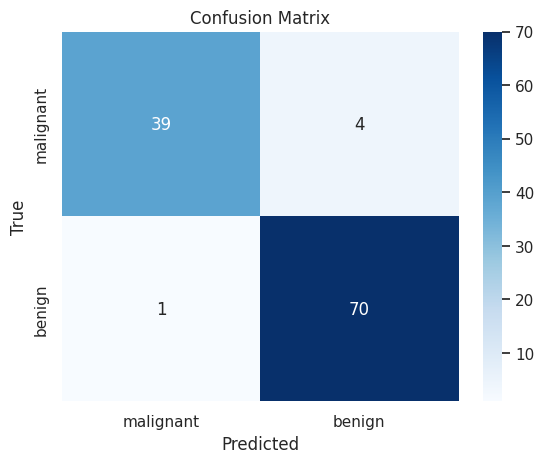

In [190]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_baseline)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

- The Baseline Regression Model was able to predict 39 malignant tumors and 70 benign tumors correctly.

- However. 1 benign and 4 malignant results were predicted incorrectly.

#Univariate Analysis

In [191]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


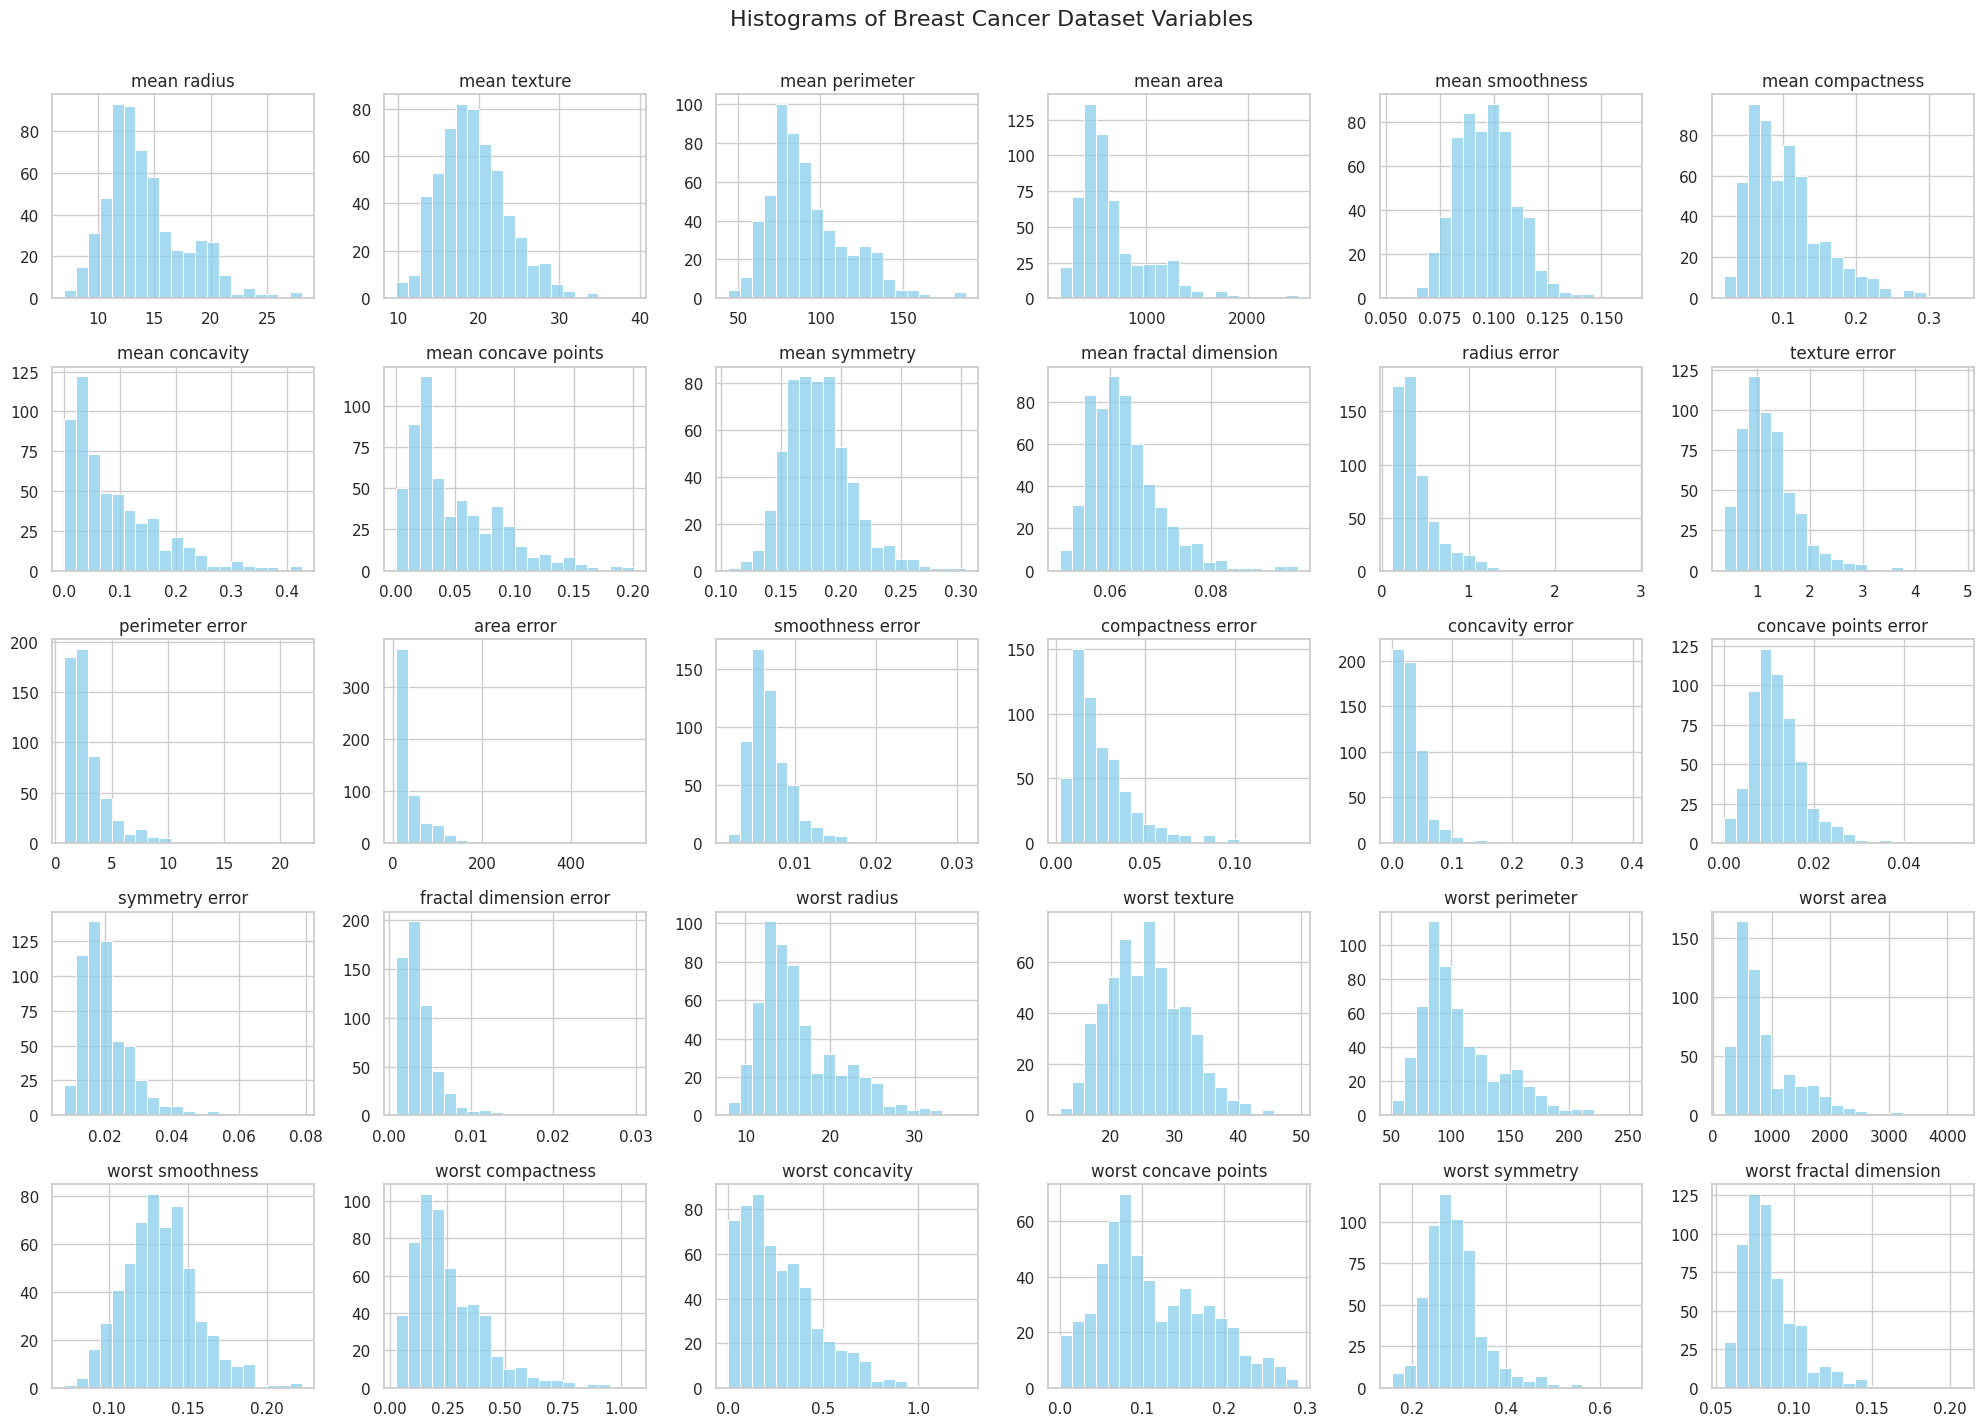

In [192]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure and axis with subplots
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(20, 15))

# Flatten the array of axes for easy iteration
axes = axes.flatten()

# Loop through each feature and plot a histogram
for i, (col, ax) in enumerate(zip(df.columns, axes)):
    sns.histplot(df[col], bins=20, kde=False, color='skyblue', ax=ax)
    ax.set_title(f'{col}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the top margin

# Set the overall title at the top
plt.suptitle('Histograms of Breast Cancer Dataset Variables', y=0.98, fontsize=16)

# Show the plot
plt.show()

**Mean Smothness, Worst texture and Worst smothness** appear to be normally distributed.

**Whereas Mean radius, Mean Texture, Mean Perimeter, Mean Area, Mean Compactness, Mean Concavity, Mean Concave Points, Mean Symmetry, Mean Fractal Dimension, Radius error, Texture Error, Perimeter Error, Area Error, Smothness Error, Compactness Error, Concavity Error, Concave Points Error, Symmetry Error, Fractal Dimension Error, Worst Radius, Worst Texture, Worst Perimeter, Worst Area, Worst Smothness, Worst Compactness, Worst Concavity, Worst Concave Points, Worst Symmetry and Worst Fractal Dimension** are all right-skewed distributions.

<ipython-input-193-b3ab2f076f2c>:9: UserWarning: 
The palette list has fewer values (9) than needed (30) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df.drop('target', axis=1), orient="h", palette=custom_palette)


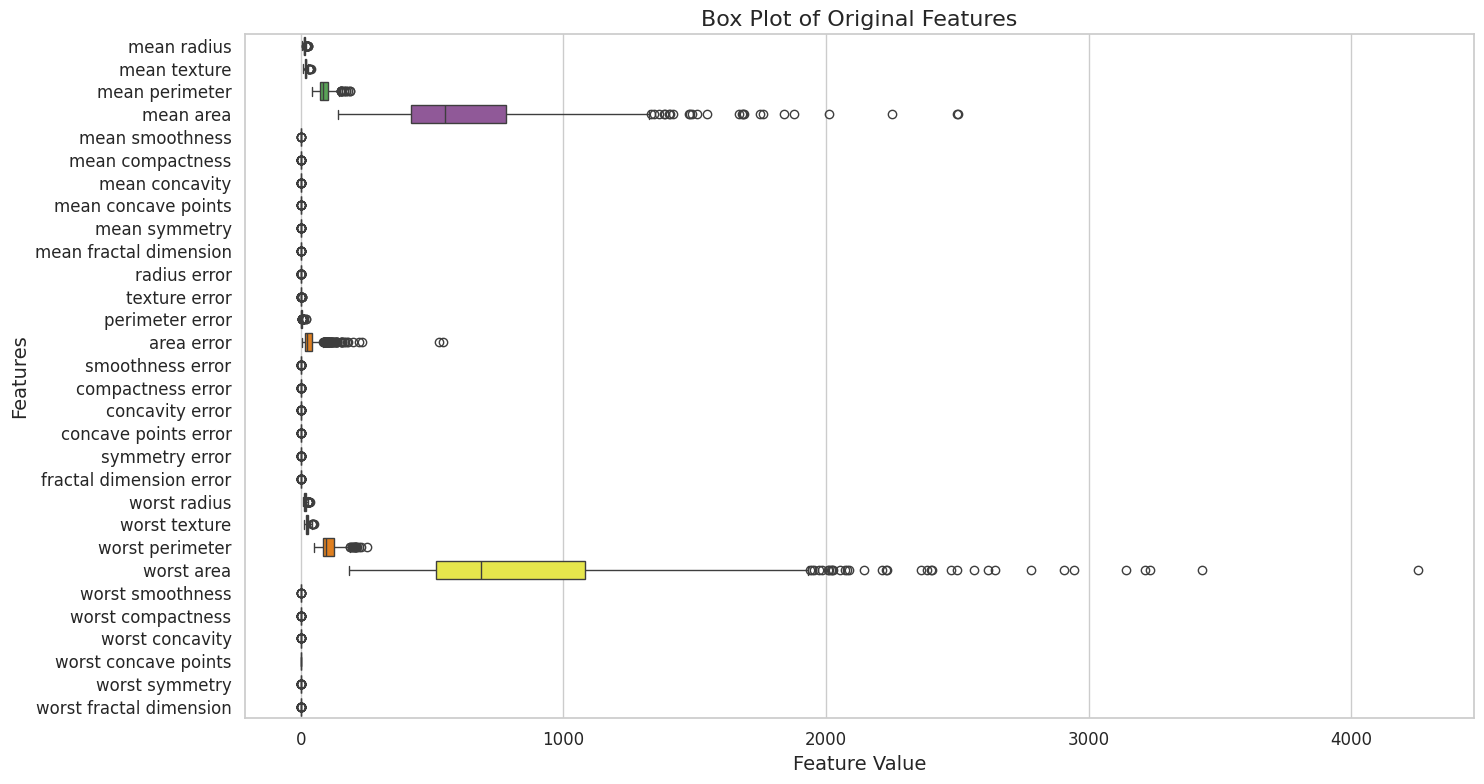

In [193]:
# Set a custom color palette for the box plot
custom_palette = sns.color_palette("Set1")

# Set the style for the plots
sns.set(style="whitegrid")

# Plot box plot for original features with enhanced design
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.drop('target', axis=1), orient="h", palette=custom_palette)

# Adjust title and labels
plt.title('Box Plot of Original Features', fontsize=16)
plt.xlabel('Feature Value', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

**Worst area** seems to be the most impactful variable in the Data set,followed by **mean area** and **area error**.

##Standardization



Given the fact that the data set contains data points in different units of measurement such as for area, perimeter and radius, it's imortant to standardize the data. Standardizing guarantees that all the features are considered "equally important".

In [194]:
scaler = StandardScaler()

# Separate features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Standardize the features
X_standardized = scaler.fit_transform(X)


In [195]:
# Create a DataFrame with standardized features
df_standardized = pd.DataFrame(X_standardized, columns=X.columns)

# Add the 'target' column to the standardized DataFrame
df_standardized['target'] = y

# Display the first few rows of the standardized DataFrame
df_standardized.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0


<ipython-input-196-da2fa39c5af8>:6: UserWarning: 
The palette list has fewer values (9) than needed (30) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df_standardized, orient="h", palette=custom_palette)


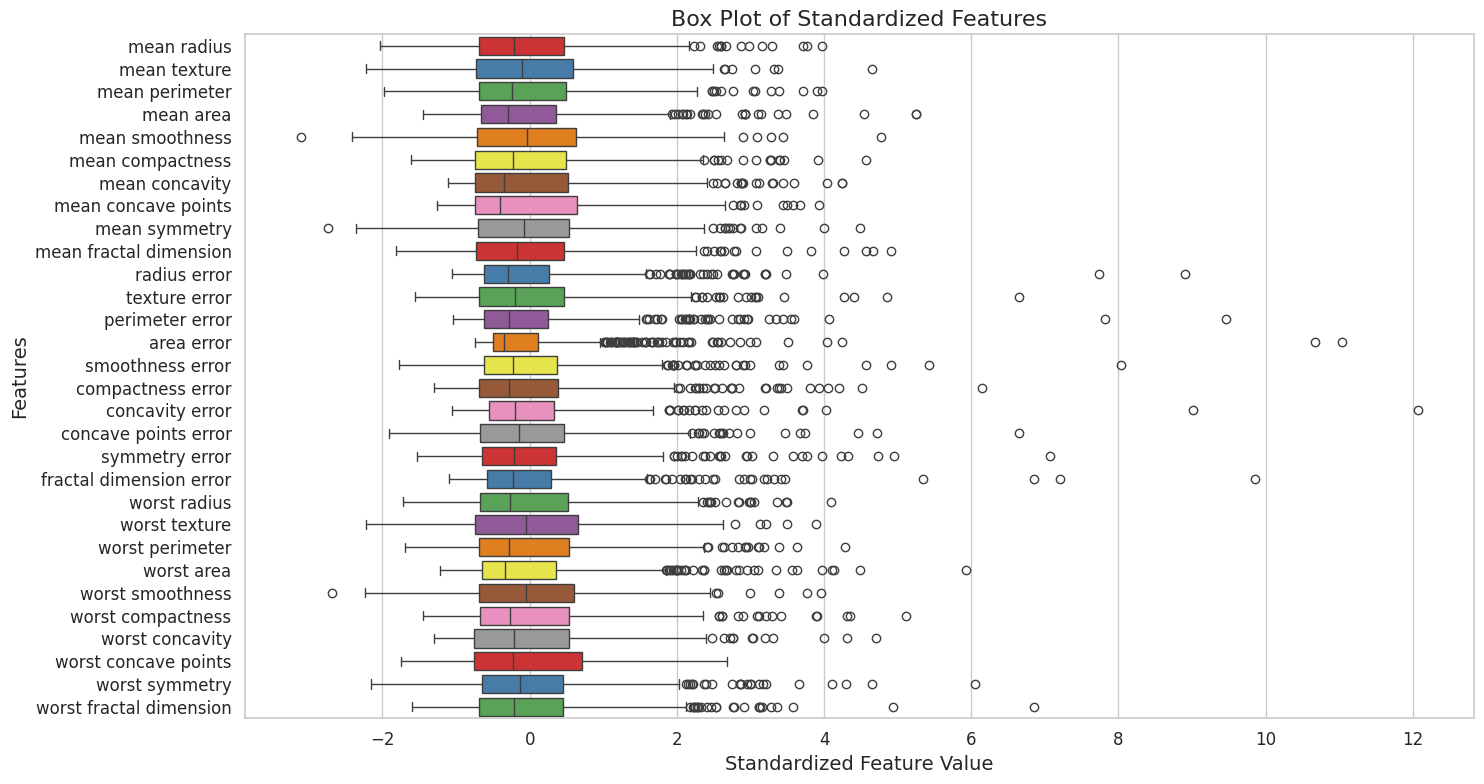

In [196]:
# Set a custom color palette for the box plot
custom_palette = sns.color_palette("Set1")

# Plot box plot for standardized features with enhanced design
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_standardized, orient="h", palette=custom_palette)

# Adjust title and labels
plt.title('Box Plot of Standardized Features', fontsize=16)
plt.xlabel('Standardized Feature Value', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [197]:
# Assuming df is the original DataFrame with 'target' column
# And you have df_standardized containing only features

# Separate features and target variable
X = df_standardized
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


- Standardizing the Data increased the Model's accuracy.

##Removing Outliers to test accuracy

In [198]:
# Assuming df_standardized is your standardized DataFrame
X = df_standardized

# Fit EllipticEnvelope to detect outliers
envelope = EllipticEnvelope(contamination=0.05)  # Adjust the contamination parameter
outlier_mask = envelope.fit_predict(X) == -1

# Create a new DataFrame with outliers removed
df_no_outliers = df_standardized.loc[~outlier_mask]

# Display information about outliers and removal
percentage_rows_removed = 100 * (outlier_mask.sum() / len(outlier_mask))
print(f"Outliers removed: {outlier_mask.sum()} rows")
print(f"Percentage of rows removed: {percentage_rows_removed:.2f}%")

# Now df_no_outliers can be used for further analysis or modeling


Outliers removed: 29 rows
Percentage of rows removed: 5.10%


- Outliers' removal up to only 5% of all the rows in order to not compromise analysis and predictions.

In [199]:
# Split the data into features (X) and target variable (y)
X = df_no_outliers.drop('target', axis=1)
y = df_no_outliers['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9814814814814815


- Removing outliers actually increased the accuracy even more, so it makes sense to keep the new df_no_outliers.

#Bivariate Analysis


##Correlation Matrix

<ipython-input-200-e77f5ef55a26>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_no_outliers.corr()


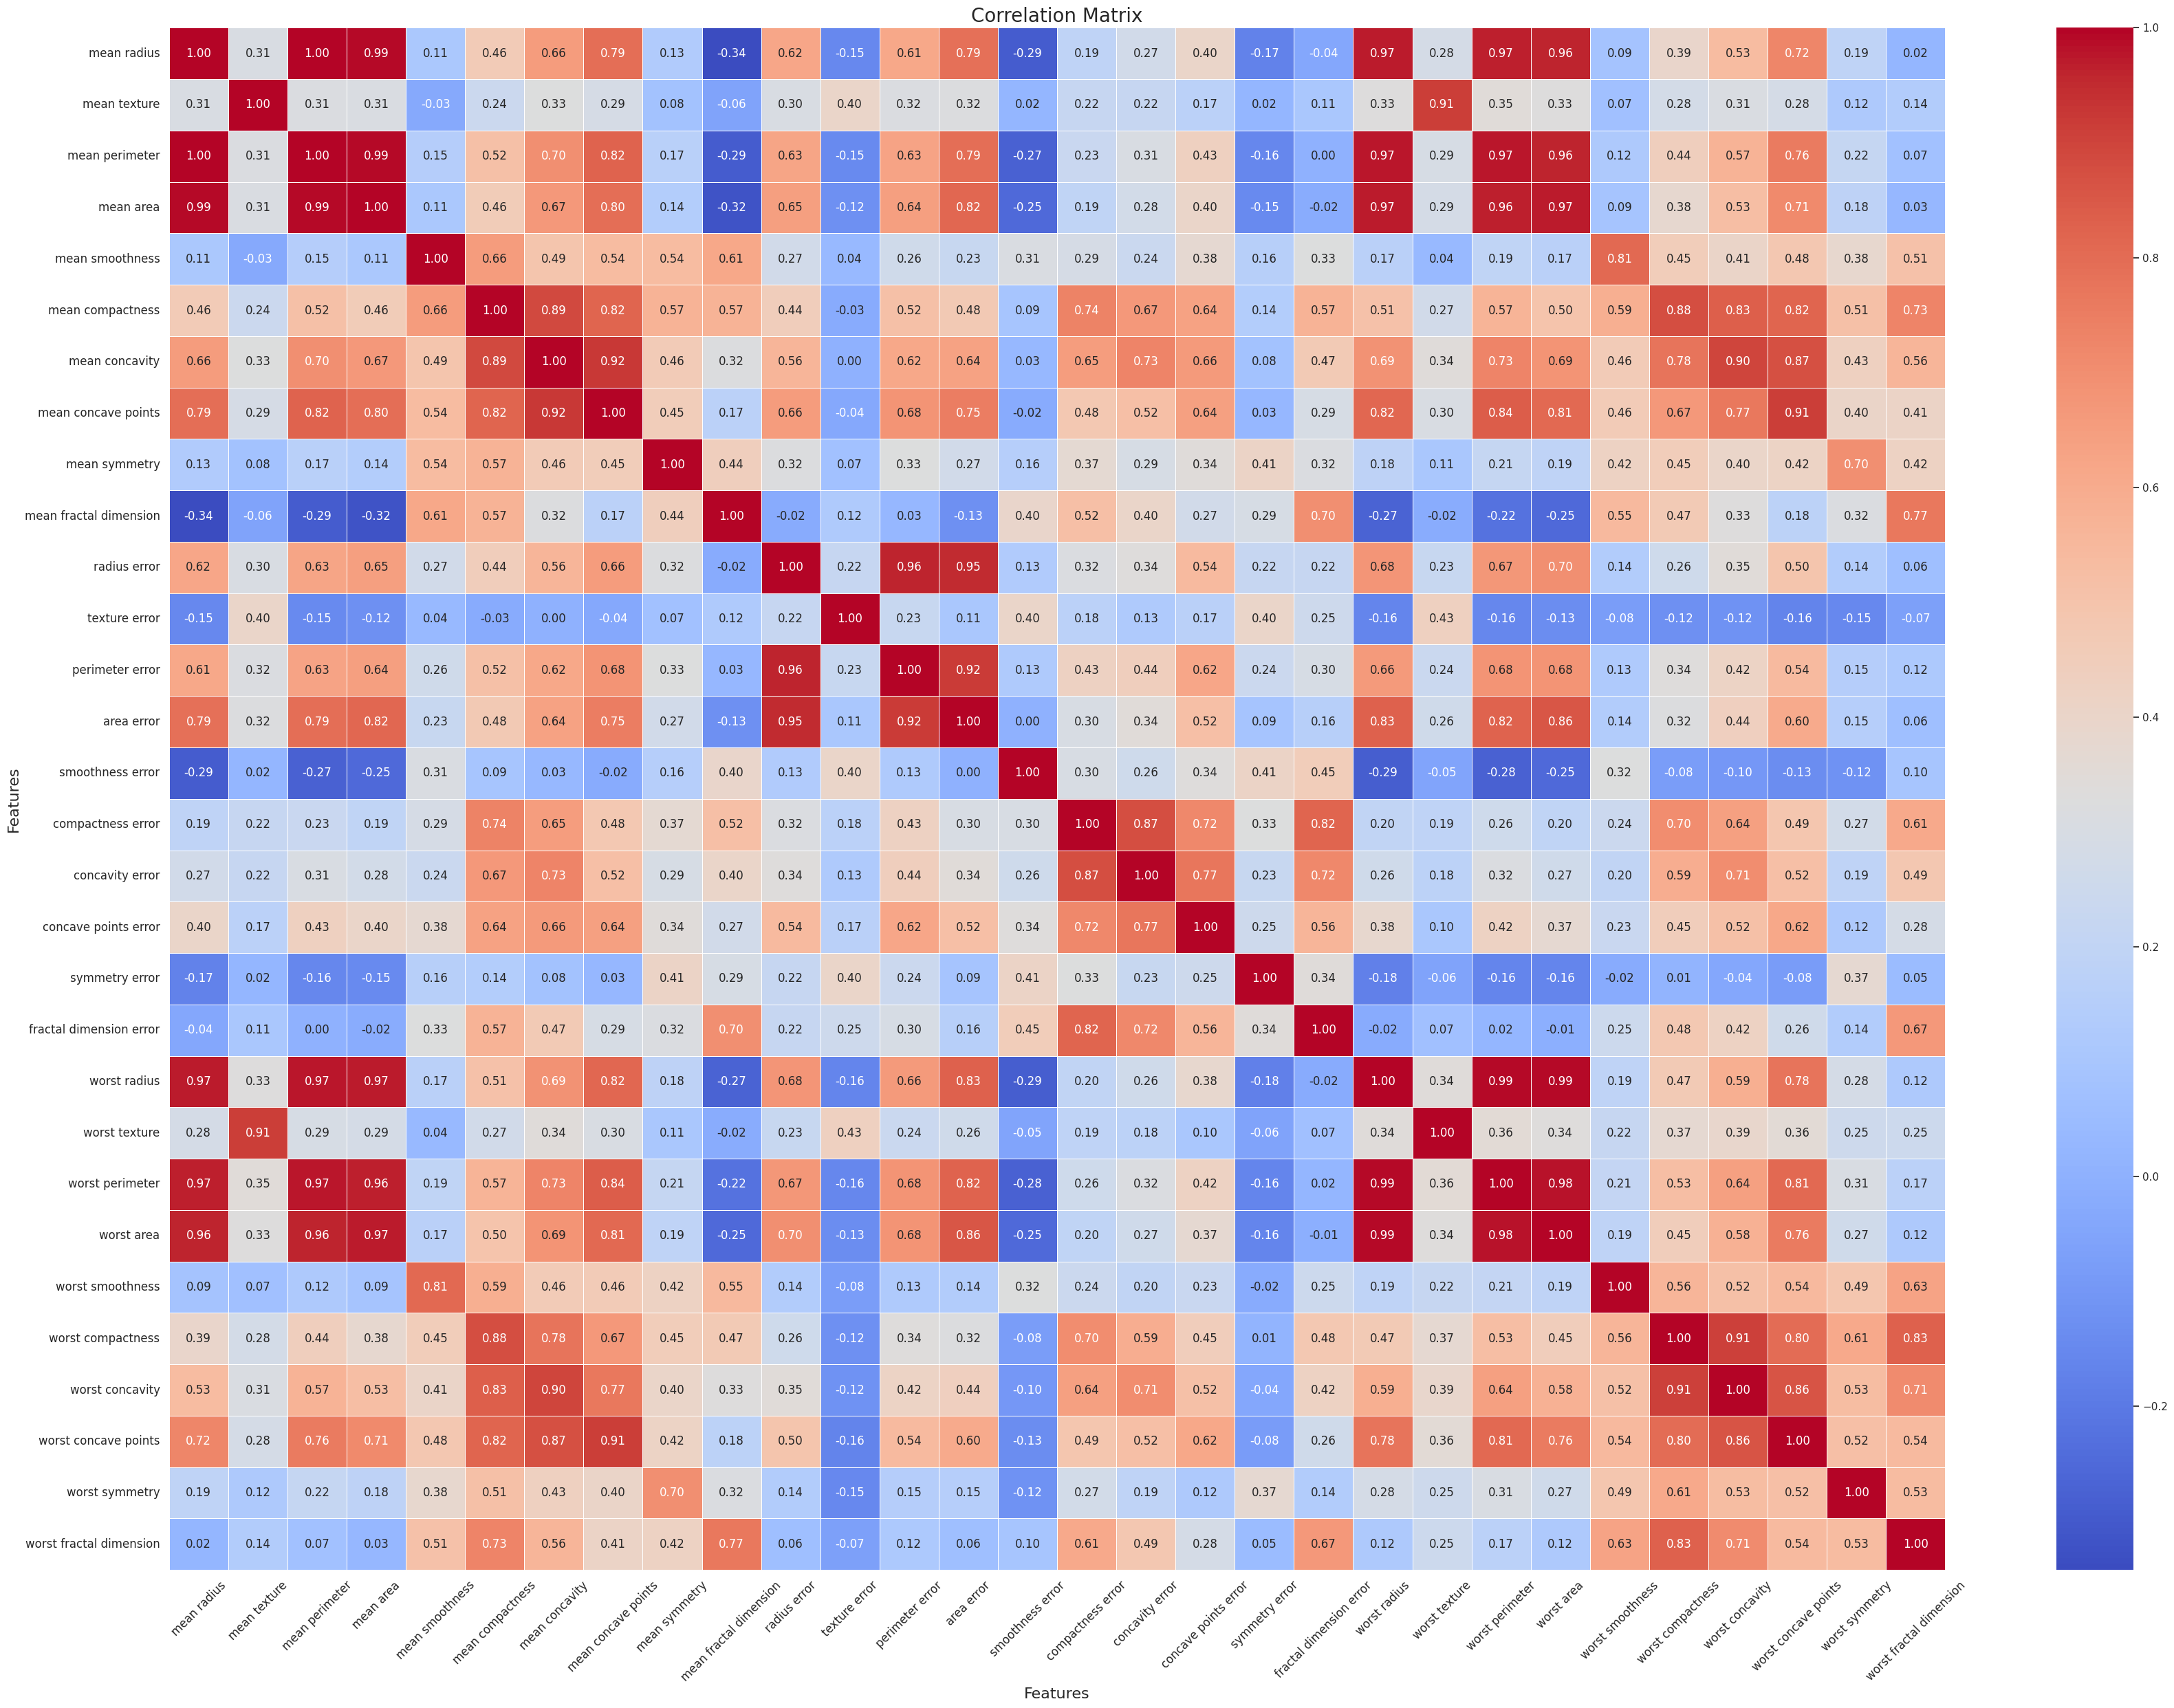

In [200]:
# Create a correlation matrix
correlation_matrix = df_no_outliers.corr()

# Set the figure size
plt.figure(figsize=(35, 25))  # Increased size

# Create the heatmap with enhanced design
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)

# Adjust title and labels
plt.title('Correlation Matrix', fontsize=20)
plt.xlabel('Features', fontsize=16)
plt.ylabel('Features', fontsize=16)
plt.xticks(fontsize=12, rotation=45)  # Rotate x-axis labels for better visibility
plt.yticks(fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

###10 strongest correlation coefficients

In [201]:
# Flatten the upper triangular part of the correlation matrix and sort by absolute values
upper_triangle_corr = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
sorted_corr = upper_triangle_corr.abs().unstack().sort_values(ascending=False)

# Extract the top 10 correlation coefficients and corresponding feature pairs
top_10_corr = sorted_corr.head(10)
top_10_corr_pairs = top_10_corr.index
top_10_corr_coefficients = top_10_corr.values

# Display the results
print("Top 10 correlation coefficients:")
for pair, coefficient in zip(top_10_corr_pairs, top_10_corr_coefficients):
    feature1, feature2 = pair
    print(f"Features: {feature1} and {feature2}, Correlation: {coefficient:.2f}")


Top 10 correlation coefficients:
Features: mean perimeter and mean radius, Correlation: 1.00
Features: worst perimeter and worst radius, Correlation: 0.99
Features: mean area and mean radius, Correlation: 0.99
Features: worst area and worst radius, Correlation: 0.99
Features: mean area and mean perimeter, Correlation: 0.99
Features: worst area and worst perimeter, Correlation: 0.98
Features: worst radius and mean perimeter, Correlation: 0.97
Features: worst perimeter and mean perimeter, Correlation: 0.97
Features: worst radius and mean radius, Correlation: 0.97
Features: worst radius and mean area, Correlation: 0.97


<ipython-input-201-fd0cf77b69cb>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle_corr = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))


 **10 Strongest Correlation coefficients:**


* Mean Radius and mean perimeter: 1.00
* Worst perimeter and worst radius: 0.99
* Mean area and mean radius: 0.99
* Worst radius and worst area: 0.99
* Mean perimeter and mean area: 0.99
* Worst area and worst perimeter: 0.98
* Worst radius and mean perimeter: 0.97
* Worst perimeter and mean perimeter: 0.97
* Worst radius and mean radius: 0.97
* Worst radius and mean area: 0.97


 Taking in consideration the fact that from 0.7 the correlation coeffitients are already considered strong, these are really high correlation coefficients. Which means that these variables have strong relationships. However, it's important to remind that correlation does not mean causation.




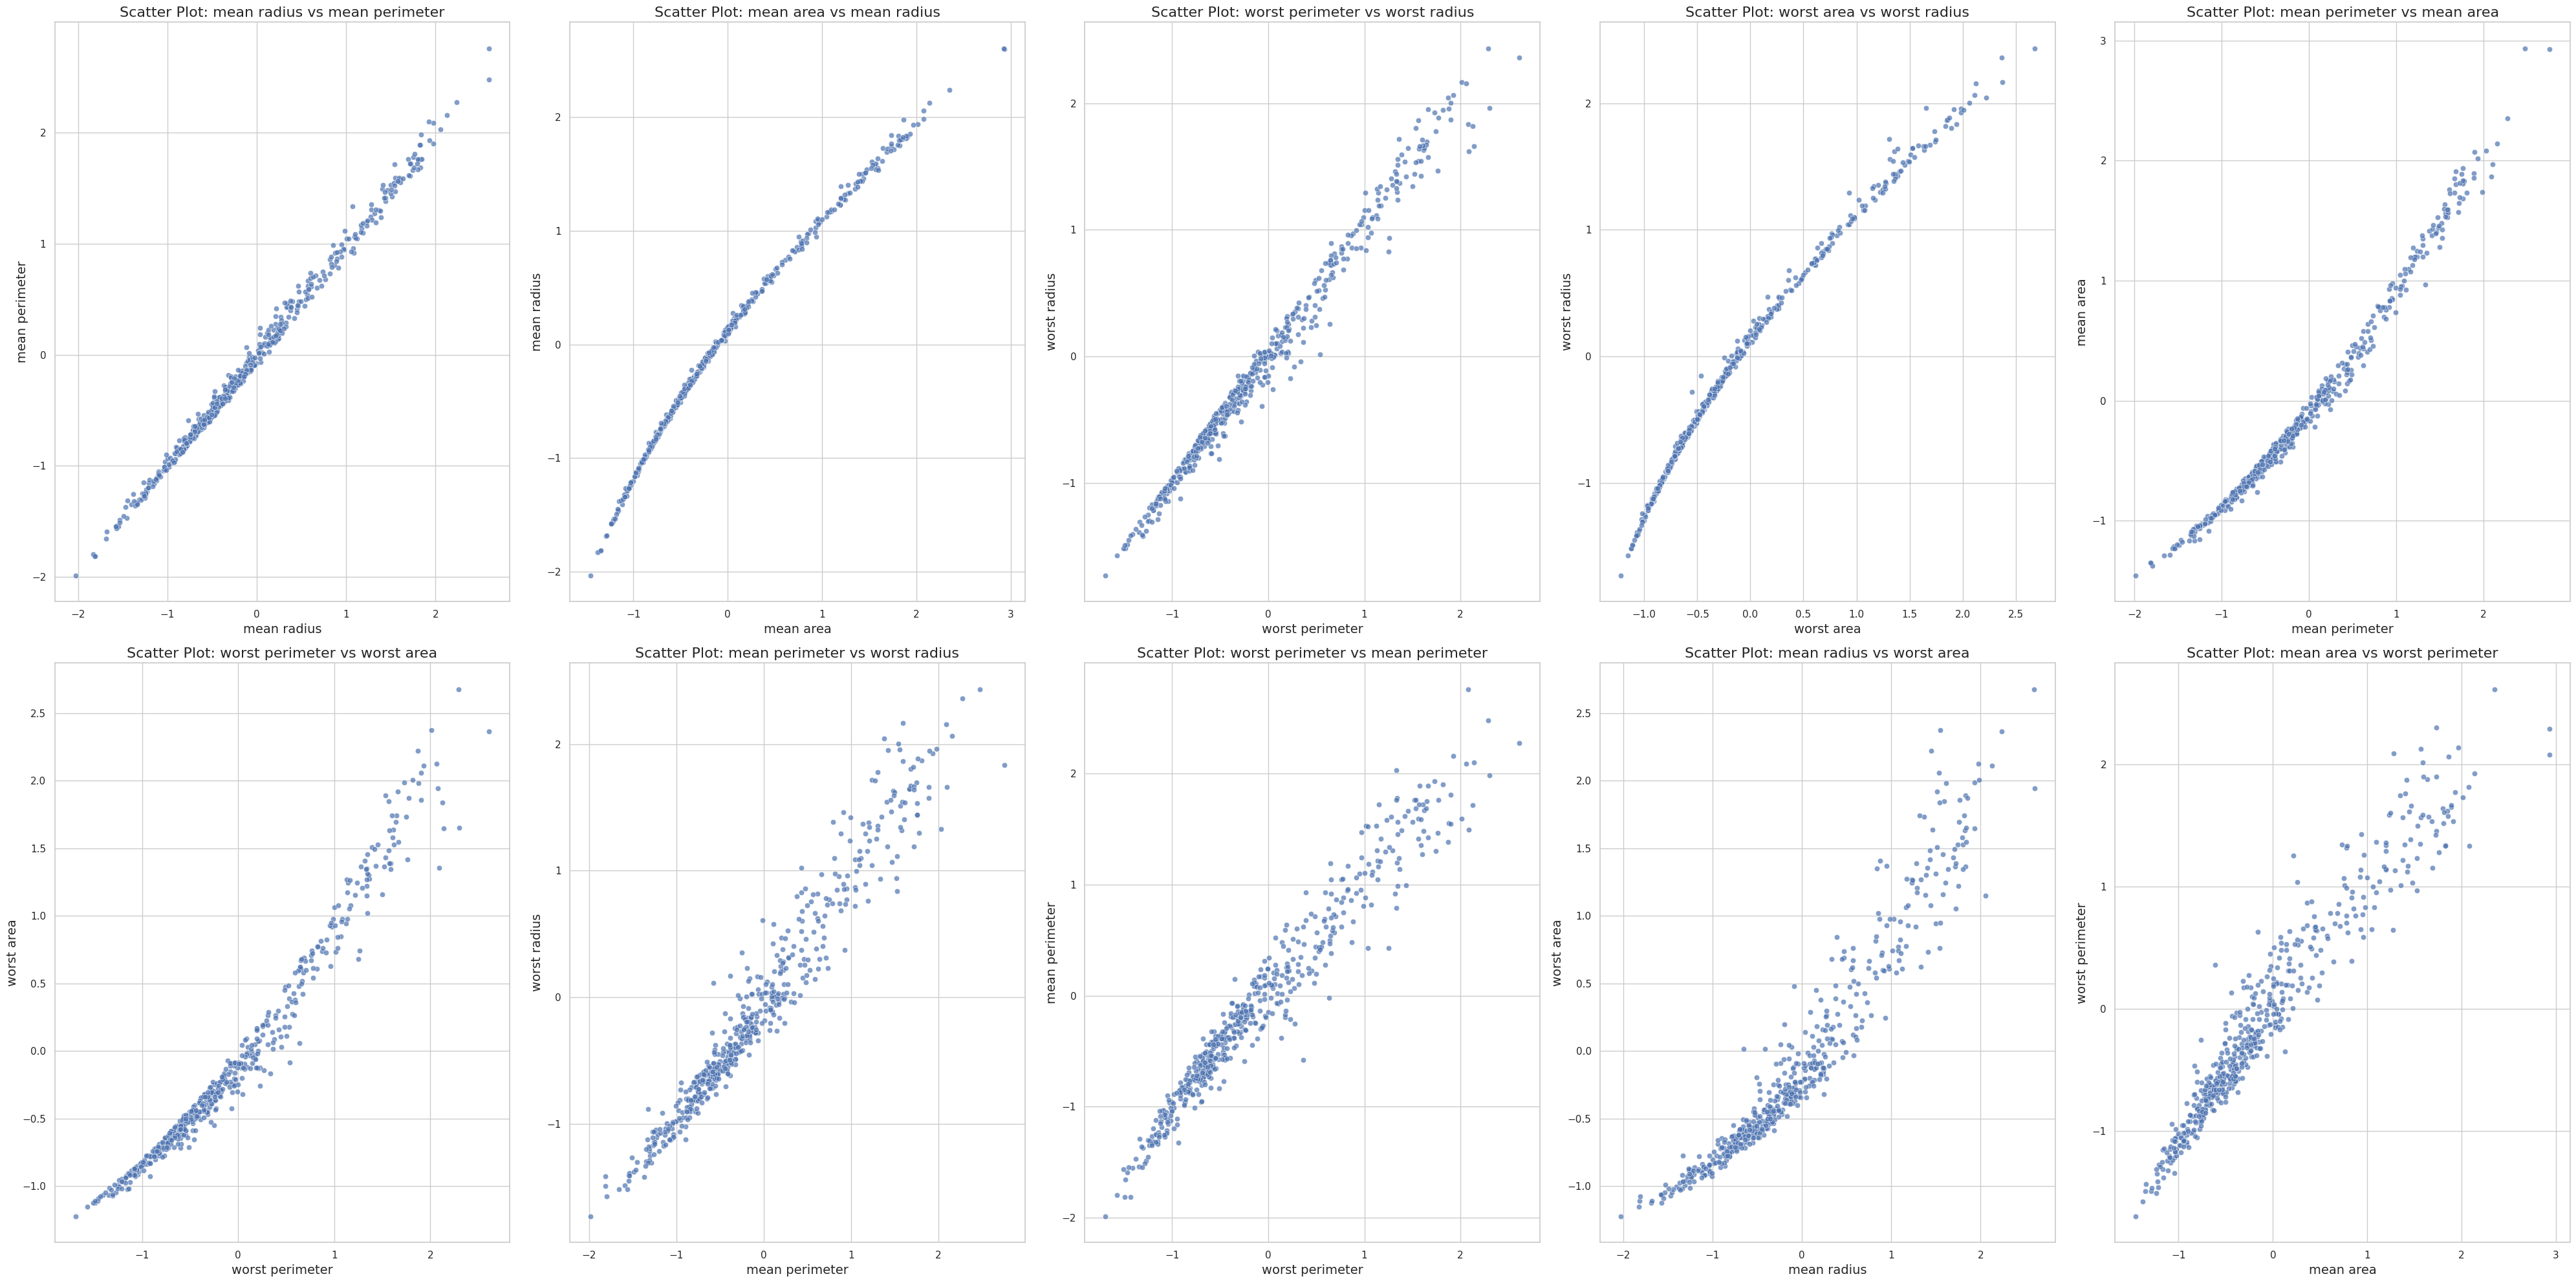

In [202]:
# Specify the top 10 correlated feature pairs
top_corr_pairs = [('mean radius', 'mean perimeter'),
                  ('mean area', 'mean radius'),
                  ('worst perimeter', 'worst radius'),
                  ('worst area', 'worst radius'),
                  ('mean perimeter', 'mean area'),
                  ('worst perimeter', 'worst area'),
                  ('mean perimeter', 'worst radius'),
                  ('worst perimeter', 'mean perimeter'),
                  ('mean radius', 'worst area'),
                  ('mean area', 'worst perimeter')]

# Create individual scatter plots for each pair
plt.figure(figsize=(40, 20))
for i, pair in enumerate(top_corr_pairs, 1):
    plt.subplot(2, 5, i)
    sns.scatterplot(x=pair[0], y=pair[1], data=df_no_outliers, marker='o', alpha=0.7)
    plt.title(f'Scatter Plot: {pair[0]} vs {pair[1]}', fontsize=16)
    plt.xlabel(pair[0], fontsize=14)
    plt.ylabel(pair[1], fontsize=14)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


- As we could state from the Correlation Matrix coefficients and now from the direction of the data points in the scatter plots, all of the 10 strongly correlated features have a positive correlation.

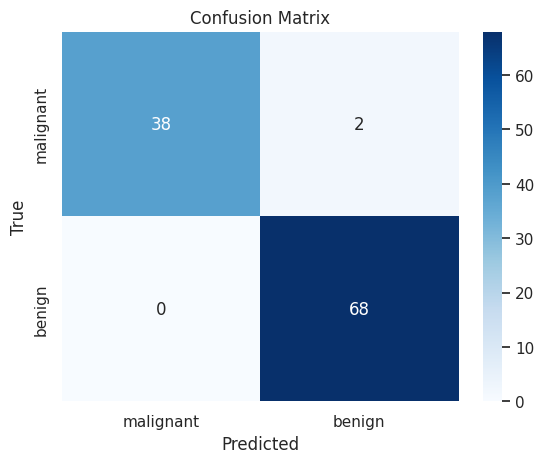

In [203]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

#Multivariate Analysis

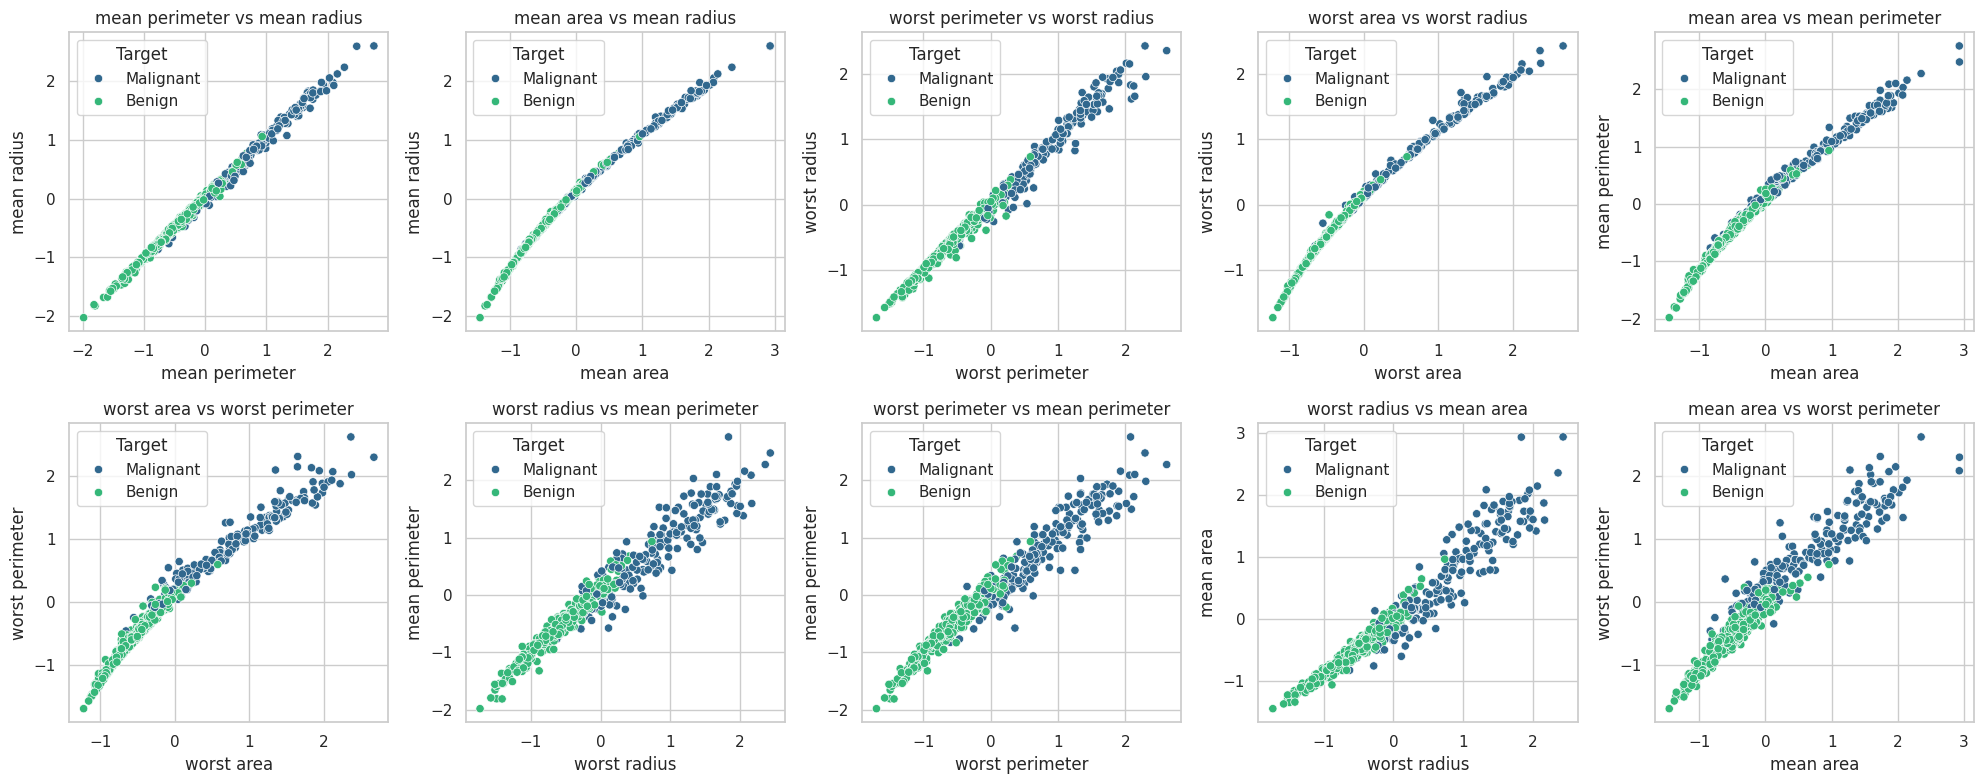

In [204]:
# List of feature pairs
feature_pairs = [('mean perimeter', 'mean radius'),
                 ('mean area', 'mean radius'),
                 ('worst perimeter', 'worst radius'),
                 ('worst area', 'worst radius'),
                 ('mean area', 'mean perimeter'),
                 ('worst area', 'worst perimeter'),
                 ('worst radius', 'mean perimeter'),
                 ('worst perimeter', 'mean perimeter'),
                 ('worst radius', 'mean area'),
                 ('mean area', 'worst perimeter')]

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

# Flatten the 2D array of subplots
axes = axes.flatten()

# Loop through feature pairs and create scatter plots
for i, pair in enumerate(feature_pairs):
    x_feature, y_feature = pair

    # Scatter plot
    sns.scatterplot(x=x_feature, y=y_feature, hue='target', data=df_no_outliers, palette='viridis', hue_order=[0, 1], ax=axes[i])

    # Set labels and title
    axes[i].set_xlabel(x_feature)
    axes[i].set_ylabel(y_feature)
    axes[i].set_title(f'{x_feature} vs {y_feature}')

    # Rename legend labels
    legend = axes[i].get_legend()
    legend.set_title('Target')
    legend.texts[0].set_text('Malignant')
    legend.texts[1].set_text('Benign')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


- In most of the distribution the clusters can be well defined. Mean Perimeter VS Mean Radius, Worst Radius VS Worst Perimeter, Worst Perimeter VS Worst Area, Mean Perimeter VS Worst Radius, Mean Perimeter VS Worst Perimeter, Mean Area VS Worst Radius and Worst Perimeter VS Mean Area have some data points pretty mixed. Mean Radius VS Mean Area, Worst Radius VS Worst Area and Mean Perimeter VS Mean Area are the ones with the best defined clusters.

- We can observe that in all of the cases, the smaller sized tumors' results are mostly for Benign tumor sizes. On the other way, as the measurements increase, we get more results for Malignant tumors.

#Feature Selection

- Application of mathematical techniques in order to find the most important  features in our data set in terms of getting the best output from our models. Thus getting rid of useless features and avoinding the curse of dimensionality.

##KBest

In [205]:
# Separate features and target variable
X_kbest = df_no_outliers.drop('target', axis=1)
y_kbest = df_no_outliers['target']

# Feature selection with KBest
kbest_selector = SelectKBest(f_classif, k=10)
X_kbest_features = kbest_selector.fit_transform(X_kbest, y_kbest)

# Display selected features from KBest
selected_features_kbest = X_kbest.columns[kbest_selector.get_support()]
print("KBest Selected Features:", selected_features_kbest)

KBest Selected Features: Index(['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points', 'area error', 'worst radius', 'worst perimeter',
       'worst area', 'worst concave points'],
      dtype='object')


- Running KBest in order to get the features with the highest chi2 scores from the statistical test runned behind the scenes. The chi2 test asseses the relationship between each feature and the target variable. Then the KBest Return the number k features considered the most relevat ones in the dataset.

- The k value was decided through experimentation.

##LASSO

In [206]:
# Assuming df_no_outliers contains your dataset
X_lasso = df_no_outliers.drop('target', axis=1)  # Drop the target variable
y_lasso = df_no_outliers['target']  # Use 'target' as your target variable

# Feature selection with LASSO
lasso_selector = Lasso(alpha=0.01)  # Adjust alpha as needed
lasso_selector.fit(X_lasso, y_lasso)

# Display selected features from LASSO
selected_features_lasso = X_lasso.columns[lasso_selector.coef_ != 0]
print("LASSO Selected Features:", selected_features_lasso)


LASSO Selected Features: Index(['mean concave points', 'mean fractal dimension', 'radius error',
       'smoothness error', 'compactness error', 'worst radius',
       'worst texture', 'worst smoothness', 'worst concavity',
       'worst concave points', 'worst symmetry'],
      dtype='object')


- Running LASSO to identify the most relevant features by driving the coefficients of the less important or irelevant features to zero and selecting the limited number of features with non-zero coefficients.

####Decioson Tree

In [207]:
# Separate features and target variable
X_dt = df_no_outliers.drop('target', axis=1)
y_dt = df_no_outliers['target']

# Initialize the logistic regression model
model = LogisticRegression(max_iter=10000)

# Use RFE to select top k features
rfe_selector = RFE(model, n_features_to_select=10)
X_rfe = rfe_selector.fit_transform(X_dt, y_dt)

# Display selected features
selected_features_rfe = X_dt.columns[rfe_selector.support_]
print("RFE Selected Features:", selected_features_rfe)

RFE Selected Features: Index(['mean concave points', 'radius error', 'area error',
       'compactness error', 'worst radius', 'worst texture', 'worst perimeter',
       'worst area', 'worst concavity', 'worst concave points'],
      dtype='object')


- Applying the decision tree method which identify key features for predicting the target variable through a tree model.


###Regression Models with Selected Features

####KBest

In [208]:
# Separate features and target variable
X = df_no_outliers[['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points', 'area error', 'worst radius', 'worst perimeter',
       'worst area', 'worst concave points']]

y = df_no_outliers['target']

# Split the dataset into training and testing sets
X_train_kbest, X_test_kbest, y_train_kbest, y_test_kbest = train_test_split(X, y, test_size=0.2, random_state = 42)

# Instantiate and train the logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')  # Multinomial logistic regression
model.fit(X_train_kbest, y_train_kbest)

# Make predictions on the test set
y_pred_kbest = model.predict(X_test_kbest)

# Evaluate the model
accuracy_kbest = accuracy_score(y_test_kbest, y_pred_kbest)

# Calculate F1 score
f1_kbest = f1_score(y_test_kbest, y_pred_kbest, average='macro')

print(f'Accuracy: {accuracy_kbest}')
print(f"F1 Score: {f1_kbest}")

Accuracy: 0.9351851851851852
F1 Score: 0.9308641975308642


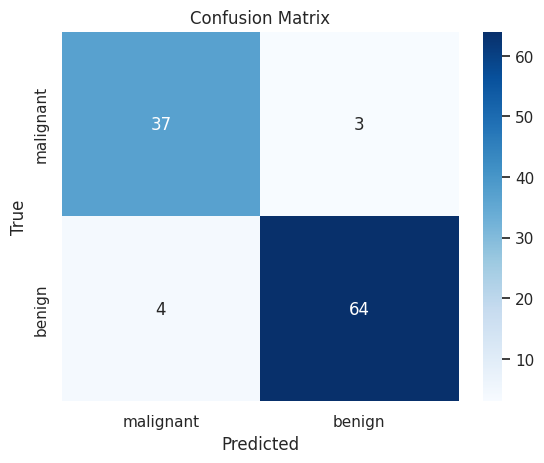

In [209]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test_kbest, y_pred_kbest)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

####LASSO

In [210]:
# Select the features and target variable

X = df_no_outliers[['mean concave points', 'mean fractal dimension', 'radius error',
                     'smoothness error', 'compactness error', 'worst radius',
                     'worst texture', 'worst smoothness', 'worst concavity',
                     'worst concave points', 'worst symmetry']]

y = df_no_outliers['target']

# Split the data into training and testing sets
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_lasso, y_train_lasso)

# Make predictions on the test set
y_pred_lasso = model.predict(X_test_lasso)

# Calculate accuracy
accuracy_lasso = accuracy_score(y_test_lasso, y_pred_lasso)
print(f"Accuracy: {accuracy_lasso}")

# Calculate F1 score
f1_lasso = f1_score(y_test_lasso, y_pred_lasso)
print(f"F1 Score: {f1_lasso}")

Accuracy: 0.9722222222222222
F1 Score: 0.9781021897810219


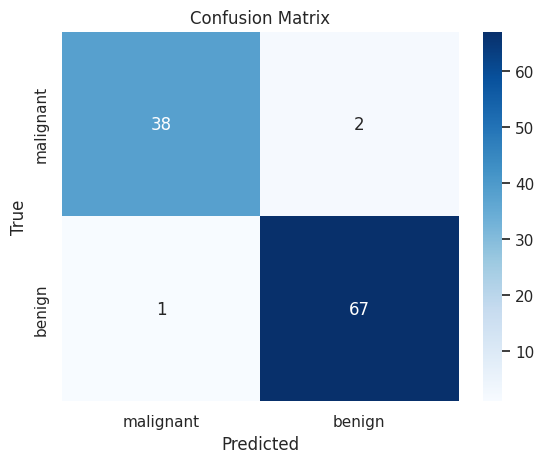

In [211]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test_lasso, y_pred_lasso)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

####Regression with KBest and LASSO Combination

In [212]:
# Features selected by KBest
X_kbest = df_no_outliers[['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
                           'mean concave points', 'area error', 'worst radius', 'worst perimeter',
                           'worst area', 'worst concave points']]

# Features selected by Lasso
X_lasso = df_no_outliers[['mean concave points', 'mean fractal dimension', 'radius error',
                          'smoothness error', 'compactness error', 'worst radius',
                          'worst texture', 'worst smoothness', 'worst concavity',
                          'worst concave points', 'worst symmetry']]

# Combine features
X_combined = pd.concat([X_kbest, X_lasso], axis=1)

# Target variable
y = df_no_outliers['target']

# Split the data into training and testing sets
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    X_combined, y, test_size=0.2, random_state=42
)

# Initialize and train the Logistic Regression model
model_combined = LogisticRegression()
model_combined.fit(X_train_combined, y_train_combined)

# Make predictions on the test set
y_pred_combined = model_combined.predict(X_test_combined)

# Calculate accuracy
accuracy_combined = accuracy_score(y_test_combined, y_pred_combined)
print(f"Accuracy: {accuracy_combined}")

# Calculate F1 score
f1_combined = f1_score(y_test_combined, y_pred_combined, average='macro')
print(f"F1 Score: {f1_combined}")

Accuracy: 0.9722222222222222
F1 Score: 0.9700637531183591


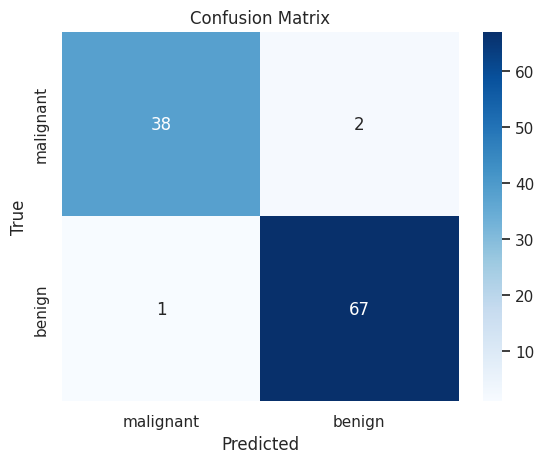

In [213]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test_combined, y_pred_combined)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

####Decision Tree

Accuracy: 0.9629629629629629
F1 Score: 0.9701492537313432
worst perimeter: 0.7065257342325725
worst texture: 0.0806833064020884
worst concave points: 0.07904212854006698
mean concave points: 0.07171044672458952
worst radius: 0.033696486113242295
area error: 0.010113807578898796
compactness error: 0.009999023532858121
worst concavity: 0.006874328678839957
worst area: 0.001354738196843479
radius error: 0.0


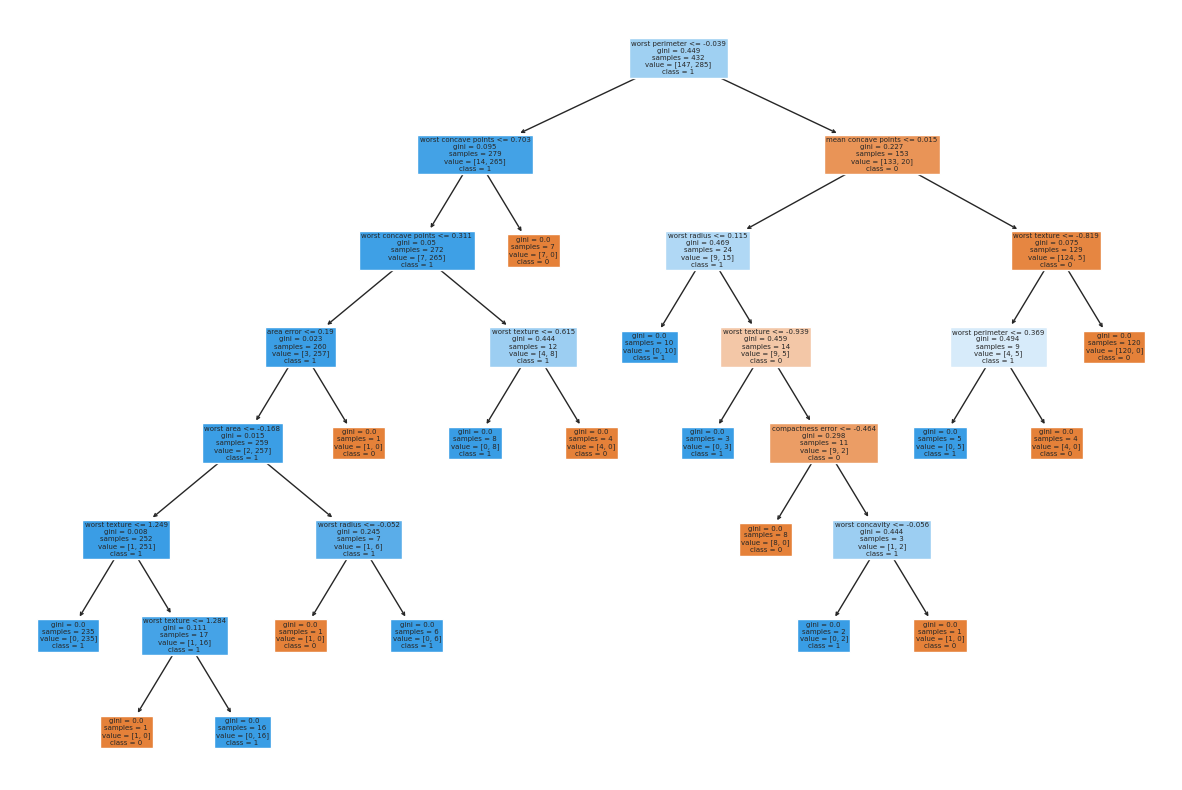

In [221]:
# Separate features and target variable
X = df_no_outliers[['mean concave points', 'radius error', 'area error',
       'compactness error', 'worst radius', 'worst texture', 'worst perimeter',
       'worst area', 'worst concavity', 'worst concave points']]
y = df_no_outliers['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train the Decision Tree classifier model
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_dt:}")

# Calculate F1 score
f1_dt = f1_score(y_test, y_pred)
print(f"F1 Score: {f1_dt:}")

# Print feature importances in descending order
feature_importance_tuples = sorted(zip(X.columns, tree.feature_importances_), key=lambda x: x[1], reverse=True)
for feature_name, importance_value in feature_importance_tuples:
    print(f"{feature_name}: {importance_value}")

# Plot the decision tree (optional)
plt.figure(figsize=(15, 10))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=['0', '1'])  # Assuming binary classification
plt.show()

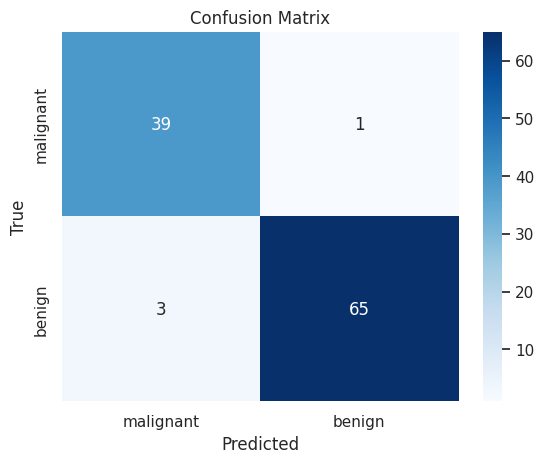

In [215]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

####Common Features between LASSO & Decision Tree

In [216]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

# Find common features
common_features = set(selected_features_rfe).intersection(selected_features_lasso)

# Select data with common features
X_common = df_no_outliers[list(common_features)]
y_common = df_no_outliers['target']  # Replace 'target' with your actual target variable

# Split the data into training and testing sets
X_train_common, X_test_common, y_train_common, y_test_common = train_test_split(
    X_common, y_common, test_size=0.2, random_state=42
)

# Initialize the logistic regression model
logistic_model_common = LogisticRegression(max_iter=10000)

# Train the model
logistic_model_common.fit(X_train_common, y_train_common)

# Make predictions on the testing set
y_pred_common = logistic_model_common.predict(X_test_common)

# Calculate accuracy and F1 score
accuracy_common = accuracy_score(y_test_common, y_pred_common)
f1_common = f1_score(y_test_common, y_pred_common, average='macro')

# Display results
print("Common Features Logistic Regression Model:")
print("Accuracy:", accuracy_common)
print("F1 Score:", f1_common)


Common Features Logistic Regression Model:
Accuracy: 0.9629629629629629
F1 Score: 0.9602941176470589


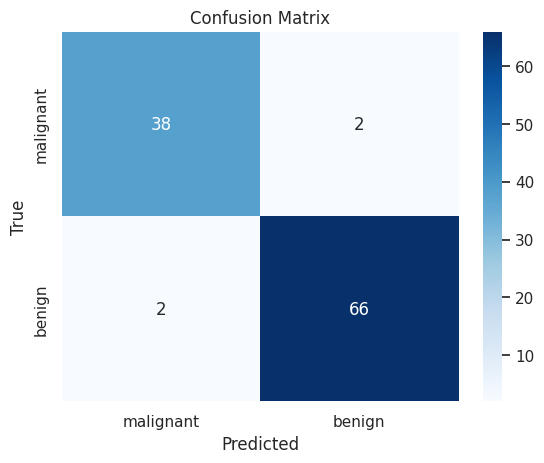

In [217]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test_common, y_pred_common)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

####Compare Models

In [222]:
# Update the results DataFrame
results = pd.DataFrame({
    'Model': ['Baseline', 'KBest', 'LASSO', 'Combined', 'Decision Tree', 'LASSO & DT'],
    'Accuracy': [accuracy_baseline1, accuracy_kbest, accuracy_lasso, accuracy_combined, accuracy_dt, accuracy_common],
    'F1 Score': [f1_baseline1, f1_kbest, f1_lasso, f1_combined, f1_dt, f1_common]
})

print(results)

           Model  Accuracy  F1 Score
0       Baseline  0.956140  0.952638
1          KBest  0.935185  0.930864
2          LASSO  0.972222  0.978102
3       Combined  0.972222  0.970064
4  Decision Tree  0.962963  0.970149
5     LASSO & DT  0.962963  0.960294


- From the comparison of Accuracy and F1 scores we can conclude that the Feature Selection Methods with the best performance were LASSO and Decision Tree individually.

In [219]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Assuming df_no_outliers contains your dataset
selected_features = ['mean concave points', 'worst radius', 'worst concave points']
X_logistic = df_no_outliers[selected_features]
y_logistic = df_no_outliers['target']  # Replace 'target' with your actual target variable

# Split the data into training and testing sets
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(
    X_logistic, y_logistic, test_size=0.2, random_state=42
)

# Initialize the logistic regression model
logistic_model = LogisticRegression(max_iter=10000)

# Train the model
logistic_model.fit(X_train_logistic, y_train_logistic)

# Make predictions on the testing set
y_pred_logistic = logistic_model.predict(X_test_logistic)

# Evaluate the model
accuracy_logistic = accuracy_score(y_test_logistic, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test_logistic, y_pred_logistic)
classification_report_logistic = classification_report(y_test_logistic, y_pred_logistic)

# Display results
print("Accuracy:", accuracy_logistic)
print("Confusion Matrix:\n", conf_matrix_logistic)
print("Classification Report:\n", classification_report_logistic)


Accuracy: 0.9166666666666666
Confusion Matrix:
 [[34  6]
 [ 3 65]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88        40
           1       0.92      0.96      0.94        68

    accuracy                           0.92       108
   macro avg       0.92      0.90      0.91       108
weighted avg       0.92      0.92      0.92       108



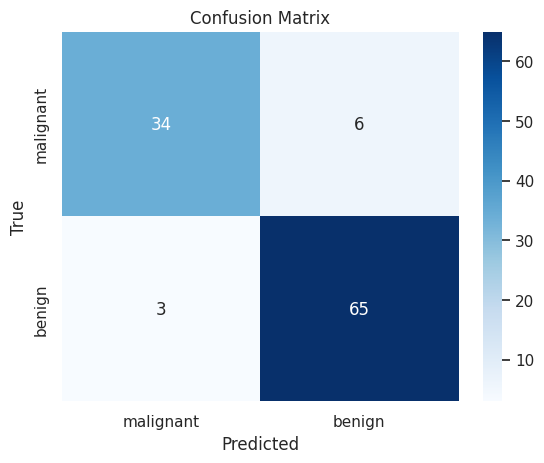

In [220]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test_logistic, y_pred_logistic)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

- Model with only three common features in all of the Feature Selection Methods built out of curiosity.